# Training Loss Over Time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list_files = {
    "AlexNet":(
        "run_training_alexnet_Conv2dRFFTFunction_date-20240129-055258.csv",
        "run_training_alexnet_Conv2dRFFTPhasorFunction_date-20240129-055258.csv"
    ),
    "DenseNet-121":(
        "run_training_densenet121_Conv2dRFFTFunction_date-20240113-174401.csv",
        "run_training_densenet121_Conv2dRFFTPhasorFunction_date-20240113-174401.csv"
    ),
    "EfficientNetB3": (
        "run_training_efficientnetb3_Conv2dRFFTFunction_date-20240129-071626.csv",
        "run_training_efficientnetb3_Conv2dRFFTPhasorFunction_date-20240129-071626.csv"
    ),
    "Inception-V3": (
        "run_training_inceptionv3_Conv2dRFFTFunction_date-20240201-033306.csv",
        "run_training_inceptionv3_Conv2dRFFTPhasorFunction_date-20240201-033306.csv"
    ),
    "ResNet-18":(
        "run_training_resnet18_Conv2dRFFTFunction_date-20240113-125419.csv",
        "run_training_resnet18_Conv2dRFFTPhasorFunction_date-20240113-125419.csv"
    ),
    "VGG-16":(
        "run_training_vgg16_Conv2dRFFTFunction_date-20240113-173444.csv",
        "run_training_vgg16_Conv2dRFFTPhasorFunction_date-20240113-173444.csv"
    )
}

AlexNet Network


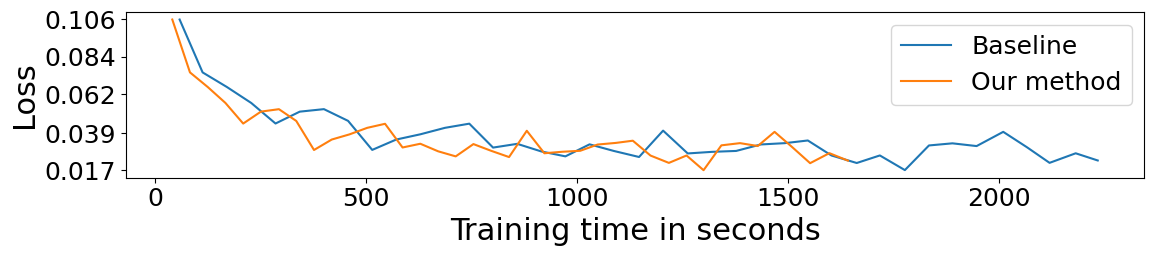

DenseNet-121 Network


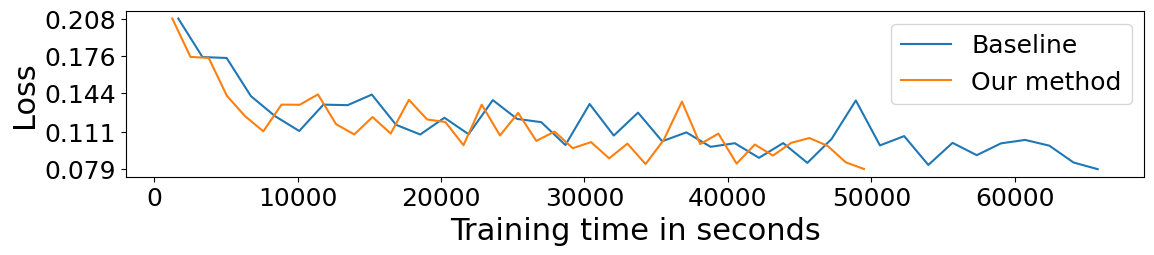

EfficientNetB3 Network


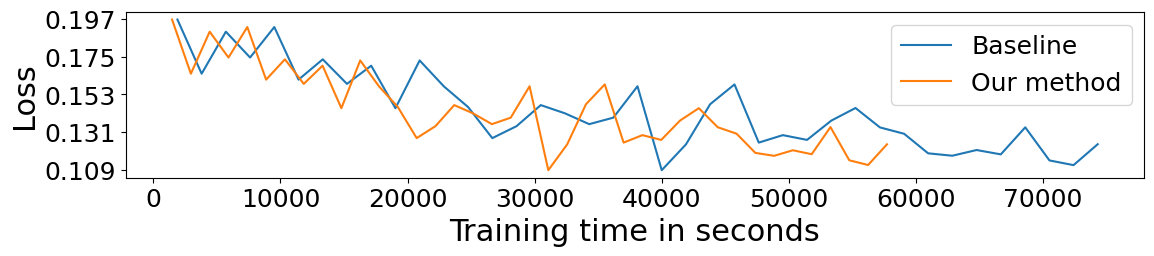

Inception-V3 Network


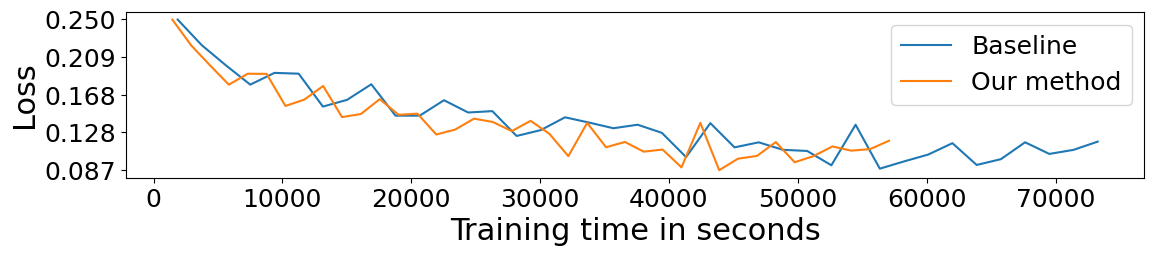

ResNet-18 Network


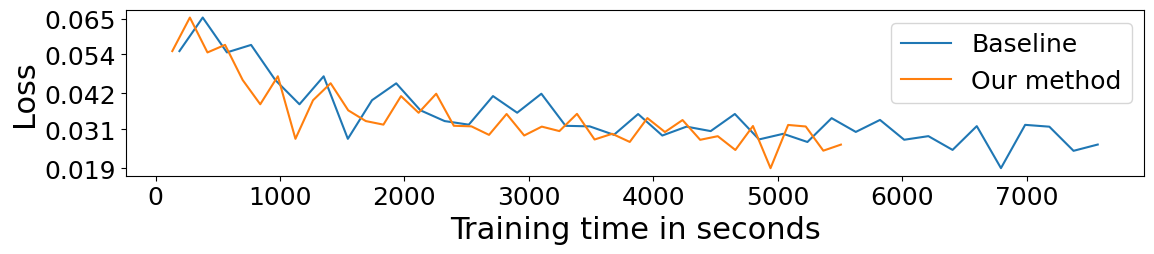

VGG-16 Network


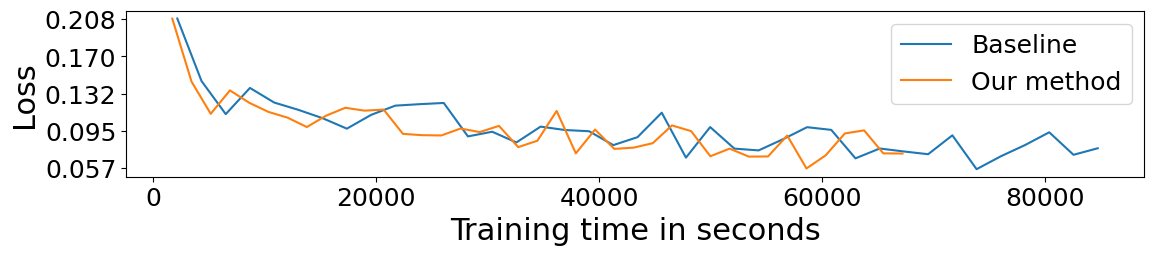

In [3]:
# Customize text sizes for all elements
text_size = 22
tick_size = 18
plt.rcParams.update({
    'font.size': text_size,          # Default font size for text elements
    'axes.titlesize': text_size,     # Title text size
    'axes.labelsize': text_size,    # Axis label text size
    'xtick.labelsize': tick_size,   # X-axis tick label size
    'ytick.labelsize': tick_size,   # Y-axis tick label size
    'legend.fontsize': tick_size    # Legend text size
})

for key, values in list_files.items():
    dnn, (baseline, our_method) = key, values
    baseline_df = pd.read_csv("../logs/" + baseline)
    baseline_df['training_latency_ms'] = baseline_df.training_runtime_forward_ms + baseline_df.training_runtime_backward_ms
    baseline_df['training_runtime'] = (baseline_df['training_step'] * baseline_df['training_latency_ms']) / 1000
    # baseline_df['training_runtime_s'] = baseline_df['training_latency'].cumsum() /1000 # This is wrong since we don't log all steps.
    baseline_df = baseline_df.set_index("training_runtime")
    ax = baseline_df.training_loss.plot(kind='line', label="Baseline", figsize=(12, 3))
    # baseline_df.training_accuracy.plot(ax=ax, secondary_y=True)

    our_method_df = pd.read_csv("../logs/" + our_method)
    our_method_df['training_latency_ms'] = our_method_df.training_runtime_forward_ms + our_method_df.training_runtime_backward_ms
    our_method_df['training_runtime'] = (our_method_df['training_step'] * our_method_df['training_latency_ms']) / 1000
    # our_method_df['training_runtime_s'] = our_method_df['training_latency'].cumsum() /1000 # This is wrong since we don't log all steps.
    our_method_df = our_method_df.set_index("training_runtime")
    our_method_df.training_loss.plot(ax=ax, label="Our method")

    ax.set_xlabel('Training time in seconds')
    ax.set_ylabel('Loss')
    # ax.set_ylabel('Accuracy')

    # Set the number of ticks in the y-axis
    num_ticks = 5  # Change this to the desired number of ticks
    y_ticks = np.linspace(min(our_method_df.training_loss), max(our_method_df.training_loss), num_ticks)
    y_ticks = np.round(y_ticks, decimals=3)
    plt.yticks(y_ticks)

    # plt.title(f"{dnn} Network")
    print(f"{dnn} Network")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"training_loss_{dnn.lower()}_cifar10.pdf", format="pdf")
    plt.show()


In [ ]:
# for key, values in list_files.items():
#     dnn, (baseline, our_method) = key, values
#     baseline_df = pd.read_csv("../logs/" + baseline)
#     baseline_df['training_latency'] = baseline_df.training_runtime_forward_ms + baseline_df.training_runtime_backward_ms
#     baseline_df['training_runtime_s'] = baseline_df['training_latency'].cumsum() /1000
#     baseline_df = baseline_df.set_index("training_runtime_s")
#     ax = baseline_df.training_accuracy.plot(kind='line', label="Baseline", figsize=(12, 3))

#     our_method_df = pd.read_csv("../logs/" + our_method)
#     our_method_df['training_latency'] = our_method_df.training_runtime_forward_ms + our_method_df.training_runtime_backward_ms
#     our_method_df['training_runtime_s'] = our_method_df['training_latency'].cumsum() /1000
#     our_method_df = our_method_df.set_index("training_runtime_s")
#     our_method_df.training_accuracy.plot(ax=ax, label="Our method")

#     ax.set_xlabel('Training time in seconds')
#     ax.set_ylabel('Accuracy')

#     # plt.title(f"{dnn} Network")
#     plt.legend()
#     plt.tight_layout()
#     plt.savefig(f"training_accuracy_{dnn.lower()}.pdf", format="pdf")
#     plt.show()
